# Lighthouse - Desafio de Ciência de Dados

**Autor**: Antonio Duarte Marcos Junior

# 3. Modelagem

## 3.1 Descrição do problema.

O problema proposto trata-se em criar um modelo capaz de predizer o valor de um veículo a partir das features informadas.

Trata-se portanto de um problema de regressão.

Algumas transformações já foram feitas nos dados e descritas no arquivo `01_analise_exploratoria.ipynb`.

Neste arquivo será dado proseguimento na análise e tratamento dos dados.

## 3.2 Leitura dos dados e importação das principais bibliotecas.

In [26]:
import pandas  as pd
import numpy   as np
import seaborn as sns
import matplotlib.pyplot as plt

df_train = pd.read_csv('./dados/cars_train_v2.csv')
df_test = pd.read_csv('./dados/cars_test.csv', sep='\t', encoding='utf-16')

## 3.3 Compatibilidade entre os datasets

Para a aplicação de um modelo de predição é necessário que ambos os datasets tenham informações semelhantes.

### Marcas

Verificando se há as mesmas marcas em ambos os dataset. O ideal é que o dataset de test tenha as mesmas marcas do dataset de treino.

In [27]:
print('Marcas no dataset de test e que não estão no dataset de treino')
for marca in df_test['marca'].unique():
    if marca not in df_train['marca'].unique():
        print(marca)
        print('Número de registros desta marca =', len(df_test.query(f'marca == "{marca}"')))

Marcas no dataset de test e que não estão no dataset de treino
LAMBORGHINI
Número de registros desta marca = 1


### Número de portas

In [28]:
print('Número de portas no dataset de test e que não estão no dataset de treino')
for portas in df_test['num_portas'].unique():
    if portas not in df_train['num_portas'].unique():
        print(portas)
        print('Número de registros deste número de portas =', len(df_test.query(f'num_portas == {portas}')))

Número de portas no dataset de test e que não estão no dataset de treino


## Tipo de veículo

In [29]:
print('Tipo de carro no dataset de test e que não estão no dataset de treino')
for tipo in df_test['tipo'].unique():
    if tipo not in df_train['tipo'].unique():
        print(tipo)
        print('Número de registros deste tipo =', len(df_test.query(f'tipo == "{tipo}"')))

Tipo de carro no dataset de test e que não estão no dataset de treino
Conversível
Número de registros deste tipo = 1


### Cor

In [30]:
print('Cor de carro no dataset de test e que não estão no dataset de treino')
for cor in df_test['cor'].unique():
    if cor not in df_train['cor'].unique():
        print(cor)
        print('Número de registros desta cor =', len(df_test.query(f'cor == "{cor}"')))

Cor de carro no dataset de test e que não estão no dataset de treino
Azul
Número de registros desta cor = 1


Como tais informações não estão no dataset de treino o modelo poderá ter dificuldades para lidar com elas. Porém, como são poucos registros, a príncipio, irá se optar por mantê-los.

## 3.4 Separação dos conjuntos de treino e teste.

Foram fornecidos dois datasets: treino e teste. Mas como o dataset de teste não contém a coluna de preço não poderá ser utilizado para avaliar os modelos. Assim, é necessário dividir o conjunto fornecido para treino em dois conjuntos: treino e teste.

A avaliação dos modelos também será feita utilizando validação cruzada. Então no final o modelo será testado em conjuntos de treino, teste e validação.

Optou-se por fazer a divisão inicial em 20% para teste e 80% para treino. Buscou-se manter a estratificação por estado anunciado, uma maneira de se manter parte da distribuição original dos dados. 

Algumas marcas irão aparecer no conjunto `x_test` e não no `x_train`, semelhante ao que acontece no conjunto real. Isto permite testar o modelo em uma condição mais próxima do que realmente aconteceria.

In [31]:
from sklearn.model_selection import train_test_split

X = df_train.drop(columns='preco') # Features
y = df_train['preco'] # Target
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=X['estado_vendedor'])

In [32]:
print('Marcas no dataset de test e que não estão no dataset de treino')
for marca in x_test['marca'].unique():
    if marca not in x_train['marca'].unique():
        print(marca)
        print('Número de registros desta marca =', len(x_test.query(f'marca == "{marca}"')))
print('='*40)
print('Tipo de carro no dataset de test e que não estão no dataset de treino')
for tipo in x_test['tipo'].unique():
    if tipo not in x_train['tipo'].unique():
        print(tipo)
        print('Número de registros deste tipo =', len(x_test.query(f'tipo == "{tipo}"')))
print('='*40)
print('Cor de carro no dataset de test e que não estão no dataset de treino')
for cor in x_test['cor'].unique():
    if cor not in x_train['cor'].unique():
        print(cor)
        print('Número de registros desta cor =', len(x_test.query(f'cor == "{cor}"')))

Marcas no dataset de test e que não estão no dataset de treino
FERRARI
Número de registros desta marca = 1
Tipo de carro no dataset de test e que não estão no dataset de treino
Cor de carro no dataset de test e que não estão no dataset de treino
Verde
Número de registros desta cor = 1


Também é importante que a variável `preco`, nosso target, tenha a mesma distribuição de dados nos conjuntos. Para verificar se todos os conjuntos têm a mesma distribuição de probabilidade será aplicado o teste de Kolmogorov-Smirnov.

In [33]:
from scipy.stats import kstest

def make_kstest(x1, x2):
    statistic, pvalue = kstest(x1, x2)
    print('P valor = ', round(pvalue, 3))
    if pvalue < 0.05:
        print("Rejeitar hipótese nula. As amostras não pertecem à mesma distribuição.")
    else:
        print("Aceitar hipótese nula. As amostras pertecem à mesma distribuição.")

print('KS teste entre: y e y_train')
make_kstest(y, y_train)
print('='*40)
print('KS teste entre: y e y_test')
make_kstest(y, y_test)
print('='*40)
print('KS teste entre: y_train e y_test')
make_kstest(y_train, y_test)


KS teste entre: y e y_train
P valor =  1.0
Aceitar hipótese nula. As amostras pertecem à mesma distribuição.
KS teste entre: y e y_test
P valor =  0.989
Aceitar hipótese nula. As amostras pertecem à mesma distribuição.
KS teste entre: y_train e y_test
P valor =  0.858
Aceitar hipótese nula. As amostras pertecem à mesma distribuição.


Os resultados mostram que os conjuntos utilizados pertencem a mesma probabilidade portanto a divisão feita está adequada.

## 3.5 Transformação dos dados.

Como visto na análise exploratória os preços dos veículos não são normalmente distribuídos e apresentam vários outilers. 
Antes de partir para a remoção de outilers. O que pode eliminar a informação de algumas marcas, e gerar erros quando o modelo se deparar com marcas desconhecidas. Será aplicada a transformação de Box-Cox na série do preços. Esta transformação busca ajustar os dados a uma distribuição normal, diminuindo assim o efeito de outliers.

In [34]:
from scipy.stats import boxcox

yt, lamda = boxcox(y_train)
lamda

-0.017240402416302755

A transformação de Box-Cox utiliza a seguinte formulação.

$$ y_i^{(\lambda)} = \begin{cases}
\frac{y_i^{(\lambda)} - 1}{\lambda} & se & \lambda \neq 0\\ 
ln(y_i)  & se &  \lambda = 0\\ 
\end{cases}$$

Em que:

$y_i$ é o valor da variável que deseja-se transformar.

$\lambda$ é o parâmetro de transformação.

Como o $\lambda$ (lambda) encontrado é praticamente igual a zero pode-se assumir a transformação utilizando apenas o cálculo do logaritmo.

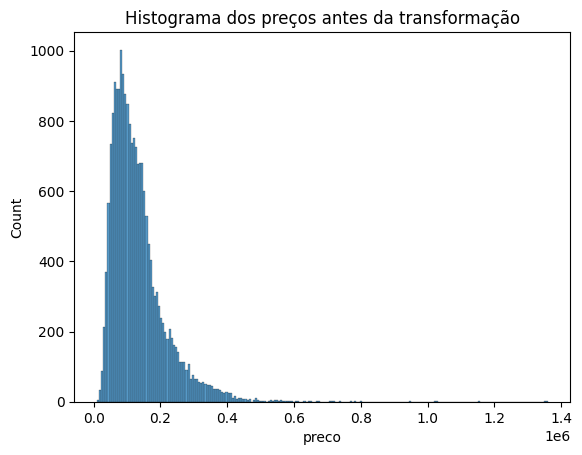

In [35]:
yt = np.log(y_train)
sns.histplot(y_train)
plt.title('Histograma dos preços antes da transformação')
plt.show()

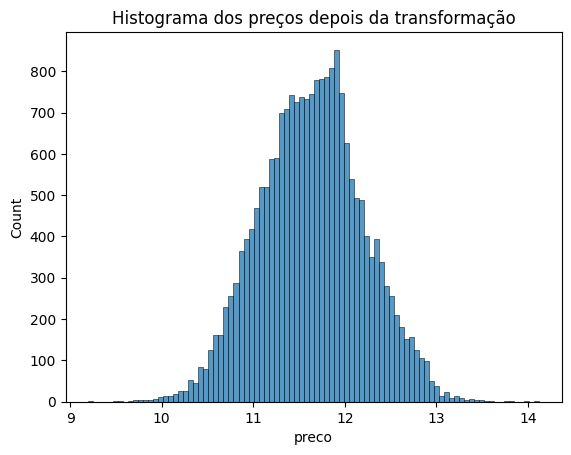

In [36]:
sns.histplot(yt)
plt.title('Histograma dos preços depois da transformação')
plt.show()

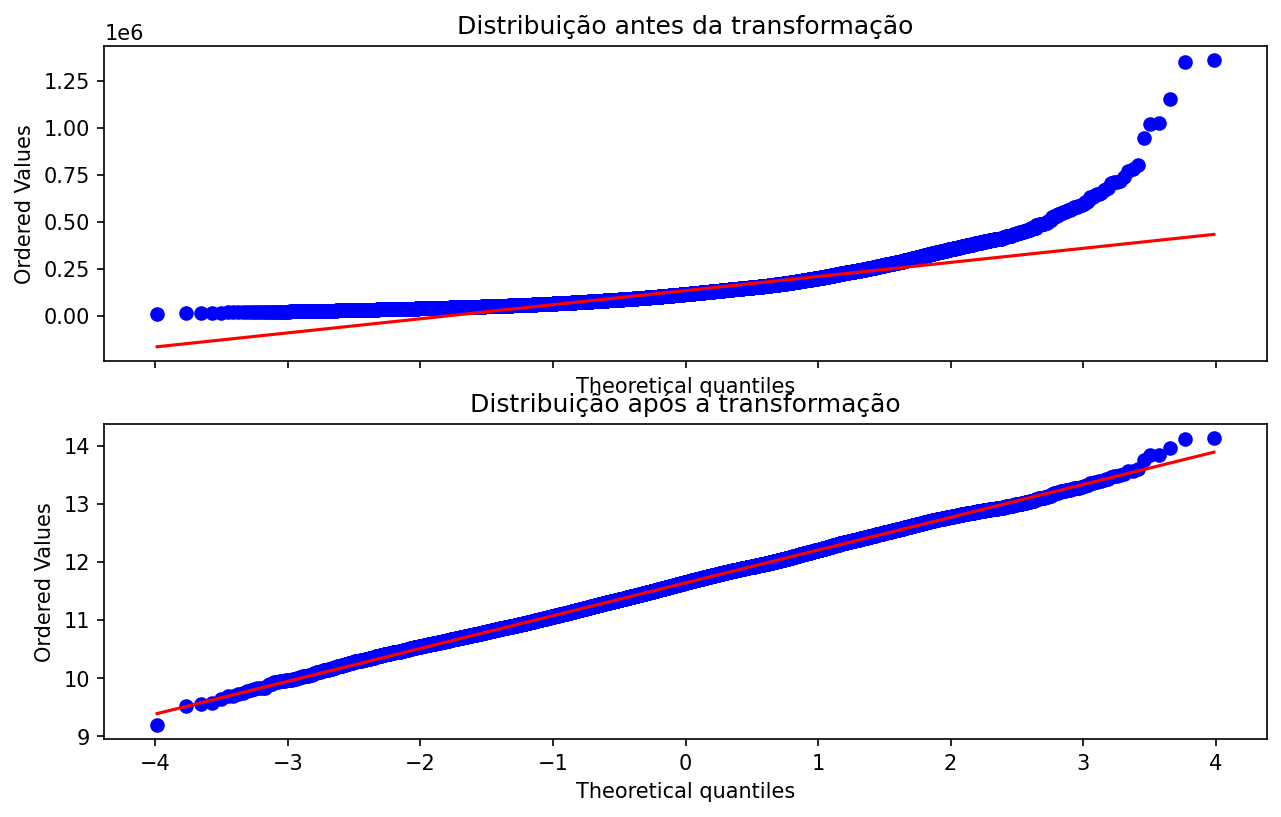

In [37]:
from scipy.stats import probplot
from scipy import stats

fig, axes = plt.subplots(2, dpi=150, figsize=(10, 6),
                         sharex=True)
prob1 = probplot(y_train, dist=stats.norm, plot=axes[0])
prob2 = probplot(yt, dist=stats.norm, plot=axes[1])
axes[0].set_title('Distribuição antes da transformação')
axes[1].set_title('Distribuição após a transformação')
plt.show()

O gráfico acima mostra que após a transformação de Box-Cox os preços dos veículos ficaram bem mais próximos de uma distribuição normal (linha vermelha no gráfico). Apenas nos extremos existem alguns pontos que se afastam. Mas isto mostra que a transformação foi suficiente para reduzir significativamente a influência de outiliers nos dados.

Considerar lambda igual a zero facilita o processo de transformação inversa dos valores. Pois, bastará calcular o exponencial do valor predito para se ter o preço do veículo na escala original.

In [38]:
y_train = np.log(y_train)
y_test = np.log(y_test)

O mesmo procedimento será aplicado ao `hodometro` para ter-se features com ordens de grandeza semelhantes.

In [39]:
hodot, lambda_hodometro = boxcox(x_train['hodometro'])
lambda_hodometro

0.5867603823151858

Como o valor encontrado de lambda não é próximo de zero não será aplicada a tranformação utilizando o logaritmo.

In [40]:
x_train['hodometro'] = hodot
x_test['hodometro'] = boxcox(x_test['hodometro'], lmbda=lambda_hodometro)

## 3.4 Seleção de features

### Seleção de features para simplificação do problema

As seguintes features serão removidas para simplificar a modelagem.

* `ano_de_fabricacao`: Pois foi criada a feature idade derivada da mesma. Seria portanto uma informação redundante.
* `ano_modelo`: Está relacionada ao ano de fabricação e também dificulta a generalização do modelo. Deseja-se um modelo capaz de generalizar os resultados o máximo possível. Incluir uma informação como ano poderá causar dificuldade para o modelo generalizar para um ano fora da listagem.
* `cidade_vendedor`: Há grande quantidade de cidades existente e algumas com nomes iguais. Será removida para simplificar o problema.
* `versao`: As principais informações desta coluna já foram extraídas e colocadas em novas features.
* `num_fotos`: As fotos são importantes para atrair o interesse em um possível comprador. Seria útil em um modelo para medir a probabilidade de venda. Mas para precificar um veículo não são tão relevantes.
* `modelo`: Há um total de 457 modelos anunciados e para simplificar o problema esta feature será desconsiderada.

In [41]:
x_train.drop(columns=['ano_de_fabricacao',
                      'ano_modelo',
                      'cidade_vendedor',
                      'versao',
                      'num_fotos',
                      'modelo'],
             inplace=True)
x_test.drop(columns=['ano_de_fabricacao',
                     'ano_modelo',
                     'cidade_vendedor',
                     'versao',
                     'num_fotos',
                     'modelo'],
           inplace=True)

### Remoção de features com baixa variância.

Features com baixa variância são aquelas em que a maiorias dos valores estão concentrados em apenas uma categoria. Serão selecionadas as features com variância mínima de 16%. 

In [42]:
from sklearn.feature_selection import VarianceThreshold

numerical_columns = ['hodometro', 'num_portas', 'blindado',
                     'entrega_delivery', 'troca', 
                     'dono_aceita_troca', 'veiculo_único_dono',
                     'revisoes_concessionaria', 'ipva_pago', 'veiculo_licenciado',
                     'garantia_de_fábrica', 'revisoes_dentro_agenda',
                     'tracao_4x4', 'idade']
sel = VarianceThreshold(threshold=0.16)
sel.fit(df_train[numerical_columns])
sel.get_feature_names_out()

array(['hodometro', 'entrega_delivery', 'dono_aceita_troca',
       'veiculo_único_dono', 'revisoes_concessionaria', 'ipva_pago',
       'veiculo_licenciado', 'idade'], dtype=object)

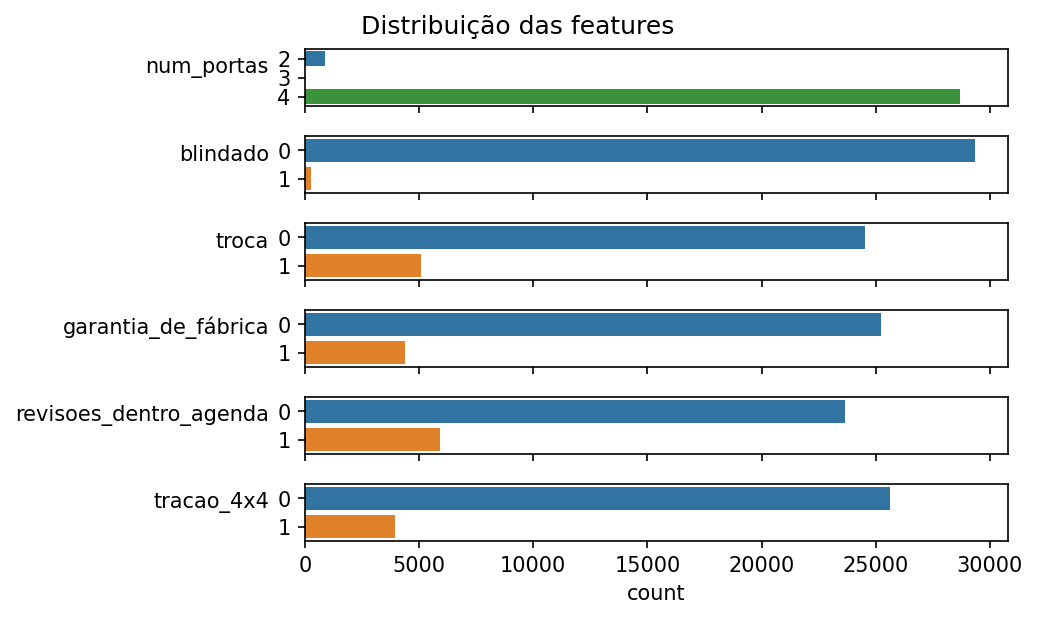

In [43]:
fig, axes = plt.subplots(6, figsize=(7, 4), dpi=150, sharex=True)
col_low_var = ['num_portas', 'blindado', 'troca', 
               'garantia_de_fábrica', 'revisoes_dentro_agenda', 'tracao_4x4']

for i, col in enumerate(col_low_var):
    sns.countplot(data=df_train, y=col, ax=axes[i])
    axes[i].set_ylabel(col, rotation = 0, ha='right')
    if i != len(col_low_var)-1:
        axes[i].set_xlabel('', rotation = 0)

fig.tight_layout()
plt.suptitle('Distribuição das features', va='bottom');


Como os gráficos mostram as features selecionadas para remoção apresentam grande concentração em apenas um único valor. E isso no conjunto de dados de treino que têm a maior quantidade de exemplares. Como a grande maioria pertence a apenas uma classe então não oferecem informação relevante para se diferenciar o preço dos veículos em um modelo de machine learning.

Remoção das features de pouca variabilidade.

In [44]:
x_train.drop(columns=col_low_var, inplace=True)
x_test.drop(columns=col_low_var, inplace=True)

### Seleção de features baseado em importância preditiva

Para selecionar as features de acordo com a importância preditiva será preciso construir antes um modelo preditivo.

O modelo escolhido é o Random Forest Regressor do Scikit-Learn. Este modelo fornece um método `feature_importances` que avalia a importância das features para a solução do problema.

Alguns preprocessamentos também foram aplicados nos dados:

* variáveis categóricas: Foi aplicado o OneHotEncoder que separa as categorias de uma determinada feature em diferentes colunas. Cada nova coluna criada têm valores zero ou um, indicando se a feature pertence ou não a categoria da coluna.
* variáveis numéricas: Foi aplicado o MinMaxScaler que faz com que os valores da feature variem apenas entre 0 e 1.



In [45]:
from sklearn.ensemble      import RandomForestRegressor # Regressor
from sklearn.preprocessing import OneHotEncoder         # Encoder das variáveis categóricas
from sklearn.preprocessing import MinMaxScaler          # Scaler das variáveis numéricas
from sklearn.pipeline      import Pipeline              # Constrói pipeline de dados
from sklearn.compose       import ColumnTransformer     # Utilizado para aplicar os transformers em colunas específicas

# Pré processamento das variáveis categóricas
categorical_features = ['marca', 'cambio', 'tipo', 'cor', 
                        'tipo_vendedor', 'estado_vendedor',
                        'anunciante', 'motor', 'combustivel']
categorical_transformer = Pipeline(
    steps=[("encoder", OneHotEncoder(handle_unknown="ignore"))]
)

# Pré processamento das variáveis numéricas
numerical_features = ['hodometro', 'idade', 'dono_aceita_troca',
                      'entrega_delivery', 'veiculo_único_dono',
                      'revisoes_concessionaria', 'ipva_pago',
                      'veiculo_licenciado']
numerical_transformer = Pipeline(
    steps=[("scaler", MinMaxScaler())]
)

# Combinação dos dois pré-processamentos
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features),
        ("num", numerical_transformer, numerical_features)
    ]
)

# Pipeline do modelo de regressão
clf = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regressor", RandomForestRegressor(random_state=101))
    ]
)

# Treinamento do modelo de regressão
clf.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['marca', 'cambio', 'tipo',
                                                   'cor', 'tipo_vendedor',
                                                   'estado_vendedor',
                                                   'anunciante', 'motor',
                                                   'combustivel']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['hodometro', 'idade',
                                                   'dono_aceita_troca',
                                                   'entrega_delivery',
                                                   'veiculo_único_dono',
                                                   'revisoes_concessionaria',
                                                   'ipva_pago',
                                                   'veiculo_licenciado'])])),
                ('regressor', RandomForestRegressor(random_state=101))])

Após o treinamento do modelo pode-se verificar quais as features de maior importância, segundo o modelo escolhido, para a definição do preço do veículo.

A importância das features é calculada pela a média e o desvio padrão acumulados da diminuição de impurezas dentro de cada árvore. A impureza é uma medida de homogeinedade nos nós da árvore. A impureza de um nó da árvore dé calculada usando a contagem de cada categoria de destino em todos os registros correspondentes ao nó especificado. O total de impurezas de Gini é calculado como uma soma de quadrados de proporções de contagem entre todas as categorias de destino por nó subtraído de um, e o resultado é multiplicado pelo número de registros. Assim, quanto melhor a impureza em uma árvore melhor seria a regressão da mesma.

A seguir são recuperados o nome das features pois o enconder gera novas colunas no dataset.

In [46]:
# Nome das features categoricas após aplicar o encoder
cat_features_names = clf.named_steps['preprocessor']\
                        .named_transformers_['cat'][0]\
                        .get_feature_names_out()

# Nome das features numéricas após aplicar o scaler
num_features_names = clf.named_steps['preprocessor']\
                        .named_transformers_['num'][0]\
                        .get_feature_names_out()

A seguir é calculada a importância de cada feature.

In [47]:
importances = pd.DataFrame(clf.named_steps['regressor'].feature_importances_)
importances.index = cat_features_names.tolist() + num_features_names.tolist()
importances.columns = ['importance']

Na célula a seguir são listadas as 15 principais features.

In [48]:
importances.sort_values(by='importance', ascending=False).head(15)

,importance
idade,0.208551
combustivel_flex,0.171409
hodometro,0.154301
motor_1.0,0.062386
cambio_Automático,0.039032
cambio_Manual,0.033055
marca_BMW,0.025597
tipo_Utilitário esportivo,0.021622
dono_aceita_troca,0.014340
cor_Branco,0.013820


Consirando as features listadas. A seleção das principais features do dataset original são listadas a seguir.

In [49]:
mainly_features = ['idade', 'hodometro', 'combustivel', 'motor',
                   'cambio', 'marca', 'tipo', 'cor', 'dono_aceita_troca']

Seleção das principais features.

In [50]:
x_train_selected = x_train[mainly_features]
x_test_selected = x_test[mainly_features]

A seguir é feito o processo para treinar um novo modelo apenas com as features selecionadas. 

Em seguida é avaliado o impacto que a seleção causou no desempenho original do modelo.

In [51]:
# Pré processamento das variáveis categóricas
categorical_features2 = ['combustivel', 'motor', 'cambio',
                        'marca', 'tipo', 'cor']
categorical_transformer2 = Pipeline(
    steps=[("encoder", OneHotEncoder(handle_unknown="ignore"))]
)

# Pré processamento das variáveis numéricas
numerical_features2 = ['idade', 'hodometro', 'dono_aceita_troca']
numerical_transformer2 = Pipeline(
    steps=[("scaler", MinMaxScaler())]
)

# Combinação dos dois pré-processamentos
preprocessor2 = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer2, categorical_features2),
        ("num", numerical_transformer2, numerical_features2)
    ]
)

# Pipeline do modelo de regressão
clf2 = Pipeline(
    steps=[
        ("preprocessor", preprocessor2),
        ("regressor", RandomForestRegressor(random_state=101))
    ]
)

# Treinamento do novo modelo de regressão
clf2.fit(x_train_selected, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['combustivel', 'motor',
                                                   'cambio', 'marca', 'tipo',
                                                   'cor']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['idade', 'hodometro',
                                                   'dono_aceita_troca'])])),
                ('regressor', RandomForestRegressor(random_state=101))])

Predições utilizando os dois modelos criados.

In [52]:
pred1 = clf.predict(x_test)           # Considera todas as features
pred2 = clf2.predict(x_test_selected) # Apenas com 9 features

Avaliação dos modelos

Para avaliar os modelos serão utilizadas as seguintes métricas

| Nome | Fórmula | Descrição | Características |
| -- | -- | -- | -- |
| MAE | $ MAE = \frac{1}{n} \sum_{i=1}^{n}{\|y_i- \hat{y}_i\|}$ | Erro Médio Absoluto | Média aritmética dos erros em termos absolutos. Menos sensível a outliers.
| RMSE | $ RMSE = \sqrt{\sum_{i=1}^{n}{\frac{(\hat{y}_i - y_i)^2}{n}}}$| Raiz do Erro Médio Quadrático | Mais sensível a outliers |
| MAPE | $ MAPE = \frac{1}{n} \sum_{i=1}^{n}\frac{\|y_i - \hat{y}_i\|}{\|y_i\|} * 100$ | Erro Médio Percentual Absoluto | Mais comprensível uma vez que o erro é dado em valores percentuais.
| R² | $ R^2 = 1 - \frac{\sum_{i=1}^{n}{(y_i - \hat{y}_i)^2}}{\sum_{i=1}^{n}{(y_i - \bar{y})^2}}$ | Coeficiente de determinação R² | É uma estatística invariante de escala que fornece a proporção de variação na variável alvo explicada pelo modelo de regressão linear.

In [53]:
# Métricas de desempenho
from sklearn.metrics import mean_absolute_error # MAE
from sklearn.metrics import mean_squared_error # MSE usado para calcular o RMSE
from sklearn.metrics import mean_absolute_percentage_error # MAPE
from sklearn.metrics import r2_score # R²

In [54]:
print('MAE R$:', mean_absolute_error(np.exp(y_test), np.exp(pred1)))
print('RMSE R$:', mean_squared_error(np.exp(y_test), np.exp(pred1), squared=False))
print('MAPE:', mean_absolute_percentage_error(np.exp(y_test), np.exp(pred1)))
print('R²:', r2_score(np.exp(y_test), np.exp(pred1)))

MAE R$: 27945.181364417134
RMSE R$: 45168.115865864784
MAPE: 0.22598545217922245
R²: 0.6935657129969484


In [55]:
print('MAE R$:', mean_absolute_error(np.exp(y_test), np.exp(pred2)))
print('RMSE R$:', mean_squared_error(np.exp(y_test), np.exp(pred2), squared=False))
print('MAPE:', mean_absolute_percentage_error(np.exp(y_test), np.exp(pred2)))
print('R²:', r2_score(np.exp(y_test), np.exp(pred2)))

MAE R$: 29055.40291539816
RMSE R$: 46162.744326370346
MAPE: 0.2369955534869949
R²: 0.6799213948502683


Teste de diferença estatísticamente significante entre as duas séries de predições.

Como as métricas têm pouca diferença entre si é aplicado o teste de Kolmogorov-Smirnov para verificar se há diferença signigicativa entre a distribuição dos resultados.

In [56]:
kstest(np.exp(pred1), np.exp(pred2))

KstestResult(statistic=0.008449752140603875, pvalue=0.9092949926318699)

As métricas de desempenho mostram pequena diferença entre os dois modelos. E o p-valor do teste de Kolmorogov-Smirnov aplicado as duas séries indica que as duas séries pertencem a mesma distribuição de probabilidade. Ou seja, não diferenças significantes entre os dois modelos e pode-se utilizar o modelo com menor quantidade de features não grandes prejuízos à qualidade das previsões.

## 3.5 Teste entre diferentes modelos de regressão

A seguir são testados diferentes modelos de regressão em busca do que oferece os melhores resultados.

### Regressão Linear

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Função para treinar um modelo e retornar o valor das métricas de avaliação
def eval_model(model, model_name, x_train, x_test, y_train, y_test):
    reg = Pipeline(
        steps=[
            ("preprocessor", preprocessor2),
            ("regressor", model)
        ]
    )

    reg.fit(x_train, y_train)

    pred = reg.predict(x_test)
    mae =  mean_absolute_error(np.exp(y_test), np.exp(pred))
    rmse = mean_squared_error(np.exp(y_test), np.exp(pred), squared=False)
    mape = mean_absolute_percentage_error(np.exp(y_test), np.exp(pred))
    r2 = r2_score(np.exp(y_test), np.exp(pred))
    return {'model': model_name, 'mae':mae, 'rmse':rmse, 'mape':mape, 'r2':r2}

results = pd.DataFrame.from_dict(eval_model(LinearRegression(),
                                            'reg_linear',
                                            x_train_selected, 
                                            x_test_selected,
                                            y_train, 
                                            y_test),
                                 orient='index').T

### Suport Vector Machine

In [58]:
from sklearn.svm import SVR

results_svr = pd.DataFrame.from_dict(eval_model(SVR(),
                                                'SVR',
                                                x_train_selected, 
                                                x_test_selected,
                                                y_train, 
                                                y_test),
                                    orient='index').T
results = pd.concat([results, results_svr])

### Random Forest

In [59]:
results_rfr = pd.DataFrame.from_dict(eval_model(RandomForestRegressor(random_state=101),
                                                'RFR',
                                                x_train_selected, 
                                                x_test_selected,
                                                y_train, 
                                                y_test),
                                    orient='index').T
results = pd.concat([results, results_rfr])

### XGBoost Regressor

In [60]:
from xgboost.sklearn import XGBRegressor

results_xgbr = pd.DataFrame.from_dict(eval_model(XGBRegressor(random_state=101),
                                                'XGBR',
                                                x_train_selected, 
                                                x_test_selected,
                                                y_train, 
                                                y_test),
                                    orient='index').T
results = pd.concat([results, results_xgbr])

### ElasticNet

In [61]:
from sklearn.linear_model import ElasticNet

results_enr = pd.DataFrame.from_dict(eval_model(ElasticNet(random_state=101),
                                                'ENR',
                                                x_train_selected, 
                                                x_test_selected,
                                                y_train, 
                                                y_test),
                                    orient='index').T
results = pd.concat([results, results_enr])

#### Resultados

In [62]:
results

,model,mae,rmse,mape,r2
0,reg_linear,31704.797791,49163.54146,0.263146,0.636956
0,SVR,27565.896932,44712.581433,0.221982,0.699716
0,RFR,29055.402915,46162.744326,0.236996,0.679921
0,XGBR,27579.820151,43928.670383,0.222756,0.710153
0,ENR,57714.060878,84014.295402,0.511153,-0.06018


Os resultados mostram que o XGBoost é ligeiramente melhor que o SVM pois têm valores de RMSE e menor e R² maior. Já quanto ao MAPE os dois têm praticamente o mesmo valor. Para o MAE o SVM apresentou melhor desempenho.

Como o RMSE é uma métrica mais sensível a outliers, ter um valor menor nesta métrica significa que o modelo é mais robusto em relação aos outliers. Por isso, será adotado o modelo XGBoost para a predição dos valores do conjunto de teste.

## 3.6 Predições do arquivo de teste

Primeiro o modelo escolhido é retreinado com todo o dataset de treino.

In [63]:
features = ['combustivel', 'motor', 'cambio',
            'marca', 'tipo', 'cor', 'idade',
            'hodometro', 'dono_aceita_troca']

x_train = df_train[features]
y_train = df_train['preco']

# Aplicando transformações
y_train = np.log(y_train)
x_train['hodometro'] = boxcox(x_train['hodometro'], lambda_hodometro)

# Treinando modelo
reg_xgbr = Pipeline(
        steps=[
            ("preprocessor", preprocessor2),
            ("regressor", XGBRegressor(random_state=101))
        ]
    )

reg_xgbr.fit(x_train, y_train)

/tmp/ipykernel_151255/755657626.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['hodometro'] = boxcox(x_train['hodometro'], lambda_hodometro)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['combustivel', 'motor',
                                                   'cambio', 'marca', 'tipo',
                                                   'cor']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['idade', 'hodometro',
                                                   'dono_aceita_troca'])])),
                ('regressor',
                 XGBRegressor(base_score=None, booster=None, cal...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=101, ...))])

Realizando predições no dataset de teste.

Tratamento dos dados.

In [64]:
# Extração das features contidas na coluna versao
df_test['motor'] = df_test['versao'].str.split(' ').str[0]
df_test['motor'].replace(["EV", "B12P", "P8", "Z.E.", "4S", "TURBO", "BEV", "ELÉTRICO"], "elétrico", inplace=True)

combustiveis = []

for versao in df_test['versao']:
    versao = versao.lower()
    if versao.find('flex') != -1:
        combustiveis.append('flex')
    elif versao.find('diesel') != -1:
        combustiveis.append('diesel')
    elif versao.find('elétrico') != -1:
        combustiveis.append('elétrico')
    else:
        combustiveis.append('gasolina')

df_test['combustivel'] = combustiveis

# Cálculo da idade do veículo
df_test['idade'] = 2023 - df_test['ano_de_fabricacao']

# Padronização de variáveis categóricas
df_test['dono_aceita_troca'].replace([np.NaN, 'Aceita troca'], [0, 1], inplace=True)
df_test['cambio'] = ['Manual' if manual else 'Automático' for manual in df_test['cambio'].str.lower().str.find('manual') != -1]


Predição dos valores.

In [65]:
x_test = df_test[features] # Seleção das features necessárias
x_test['hodometro'] = boxcox(x_test['hodometro'], lambda_hodometro) # Normalização dos valores

# Predição do preço dos veículos
pred_test = np.exp(reg_xgbr.predict(x_test))

# Exportando os resultados obtidos
pred_test = pd.DataFrame(pred_test, columns=['preco'])
pred_test['id'] = df_test['id']
pred_test = pred_test[['id', 'preco']]
pred_test.to_csv('predicted.csv', index=False)

/tmp/ipykernel_151255/4050030979.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['hodometro'] = boxcox(x_test['hodometro'], lambda_hodometro) # Normalização dos valores
